In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# import missingno as msno

from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('train.csv', index_col='ID')
df

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


Some columns you may think that they are numerical but detected as object (categorical)

In [5]:
always_unique_name = (df.groupby('Customer_ID')['Name'].nunique() != 1).sum() == 0
always_unique_name
# each customer has only one corresponding Name-> we won't need the 'Name' column

True

In [6]:
always_unique_ssn = (df.groupby('Customer_ID')['SSN'].nunique() != 1).sum() == 0
always_unique_ssn
# not all customers have unique SSN - do we want to handle this?

False

In [7]:
#drop columns that we won't need
df.drop(columns=['SSN', 'Name'], axis=1, inplace=True)

In [8]:
for col in df.columns:
    print(f"Unique Values of {col}")
    print(df[col].unique())
    print("==================================================")

Unique Values of Customer_ID
['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c']
Unique Values of Month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August']
Unique Values of Age
['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique Values of Occupation
['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']
Unique Values of Annual_Income
['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique Values of Monthly_Inhand_Salary
[1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333]
Unique Values of Num_Bank_Accounts
[   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 1647 1696 1338  649  889 1668  685  857  975 1496
 1534 1620   37 1388 1429 1332 1588  120 1777 1096  803  494  744 1139
  831 1613  741  121  665 1748 

In [9]:
df['Credit_History_Age']

ID
0x1602      22 Years and 1 Months
0x1603                        NaN
0x1604      22 Years and 3 Months
0x1605      22 Years and 4 Months
0x1606      22 Years and 5 Months
                    ...          
0x25fe9     31 Years and 6 Months
0x25fea     31 Years and 7 Months
0x25feb     31 Years and 8 Months
0x25fec     31 Years and 9 Months
0x25fed    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [10]:
numerical_cols= ['Age','Annual_Income','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card','Interest_Rate',
                 'Num_of_Loan','Num_of_Delayed_Payment','Changed_Credit_Limit',
                 'Num_Credit_Inquiries','Outstanding_Debt','Credit_Utilization_Ratio','Credit_History_Age',
                 'Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

In [11]:
def remove_underscore(col):
    # Only apply the transformation if the column is not 'Credit_History_Age'
    if col != 'Credit_History_Age':
        df[col] = df[col].apply(lambda x: str(x).replace("_", "") if pd.notnull(x) else x)
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Now, you can call remove_underscore for each column that you need to clean,
# excluding 'Credit_History_Age'

for col in numerical_cols:
    remove_underscore(col)

In [12]:
df['Credit_History_Age']

ID
0x1602      22 Years and 1 Months
0x1603                        NaN
0x1604      22 Years and 3 Months
0x1605      22 Years and 4 Months
0x1606      22 Years and 5 Months
                    ...          
0x25fe9     31 Years and 6 Months
0x25fea     31 Years and 7 Months
0x25feb     31 Years and 8 Months
0x25fec     31 Years and 9 Months
0x25fed    31 Years and 10 Months
Name: Credit_History_Age, Length: 100000, dtype: object

In [13]:
#transform dates to # months

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return np.nan

df['Credit_History_Age'] = df['Credit_History_Age'].apply(parse_years_and_months)

In [14]:
df['Credit_History_Age']

ID
0x1602     265.0
0x1603       NaN
0x1604     267.0
0x1605     268.0
0x1606     269.0
           ...  
0x25fe9    378.0
0x25fea    379.0
0x25feb    380.0
0x25fec    381.0
0x25fed    382.0
Name: Credit_History_Age, Length: 100000, dtype: float64

In [15]:
df['Monthly_Balance']

ID
0x1602     312.494089
0x1603     284.629162
0x1604     331.209863
0x1605     223.451310
0x1606     341.489231
              ...    
0x25fe9    479.866228
0x25fea    496.651610
0x25feb    516.809083
0x25fec    319.164979
0x25fed    393.673696
Name: Monthly_Balance, Length: 100000, dtype: float64

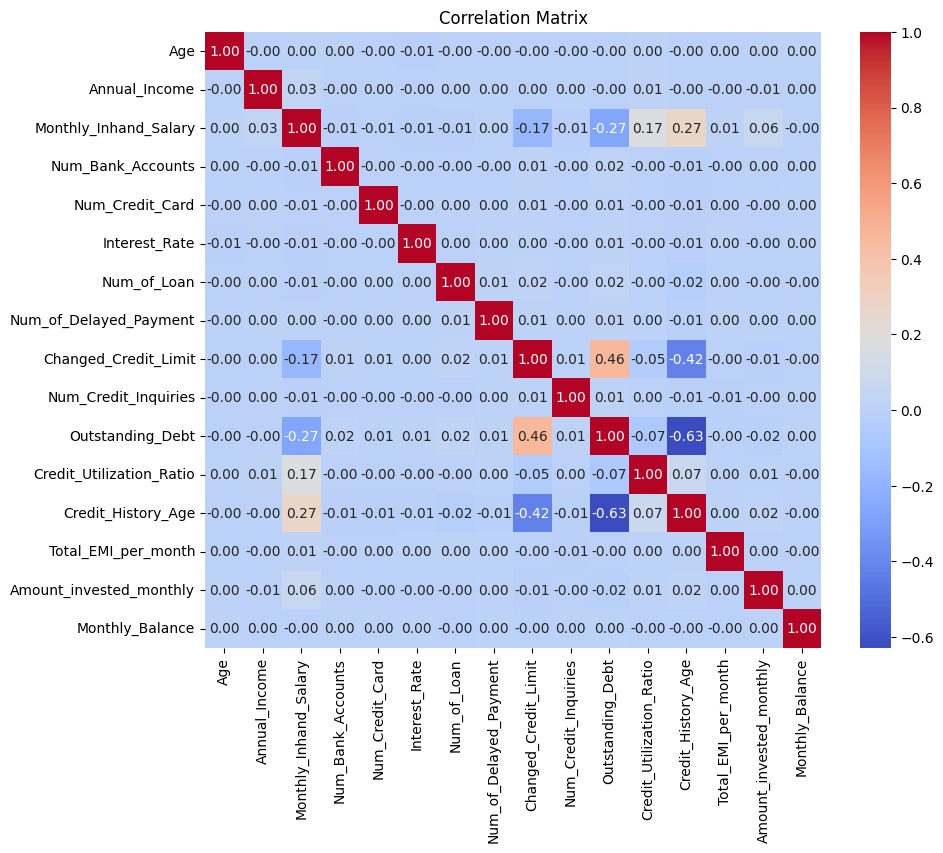

In [16]:
# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [183]:
#find highly correlated features
highly_correlated_feat= [(i, j) for i in range(len(corr_matrix.columns)) 
                           for j in range(i) if abs(corr_matrix.iloc[i, j]) >= 0.9]
highly_correlated_feat

[]

In [184]:
#find highly correlated feature names
highly_correlated_feature_names = [(corr_matrix.columns[i], corr_matrix.columns[j]) for i, j in highly_correlated_feat]
print(highly_correlated_feature_names)

[]


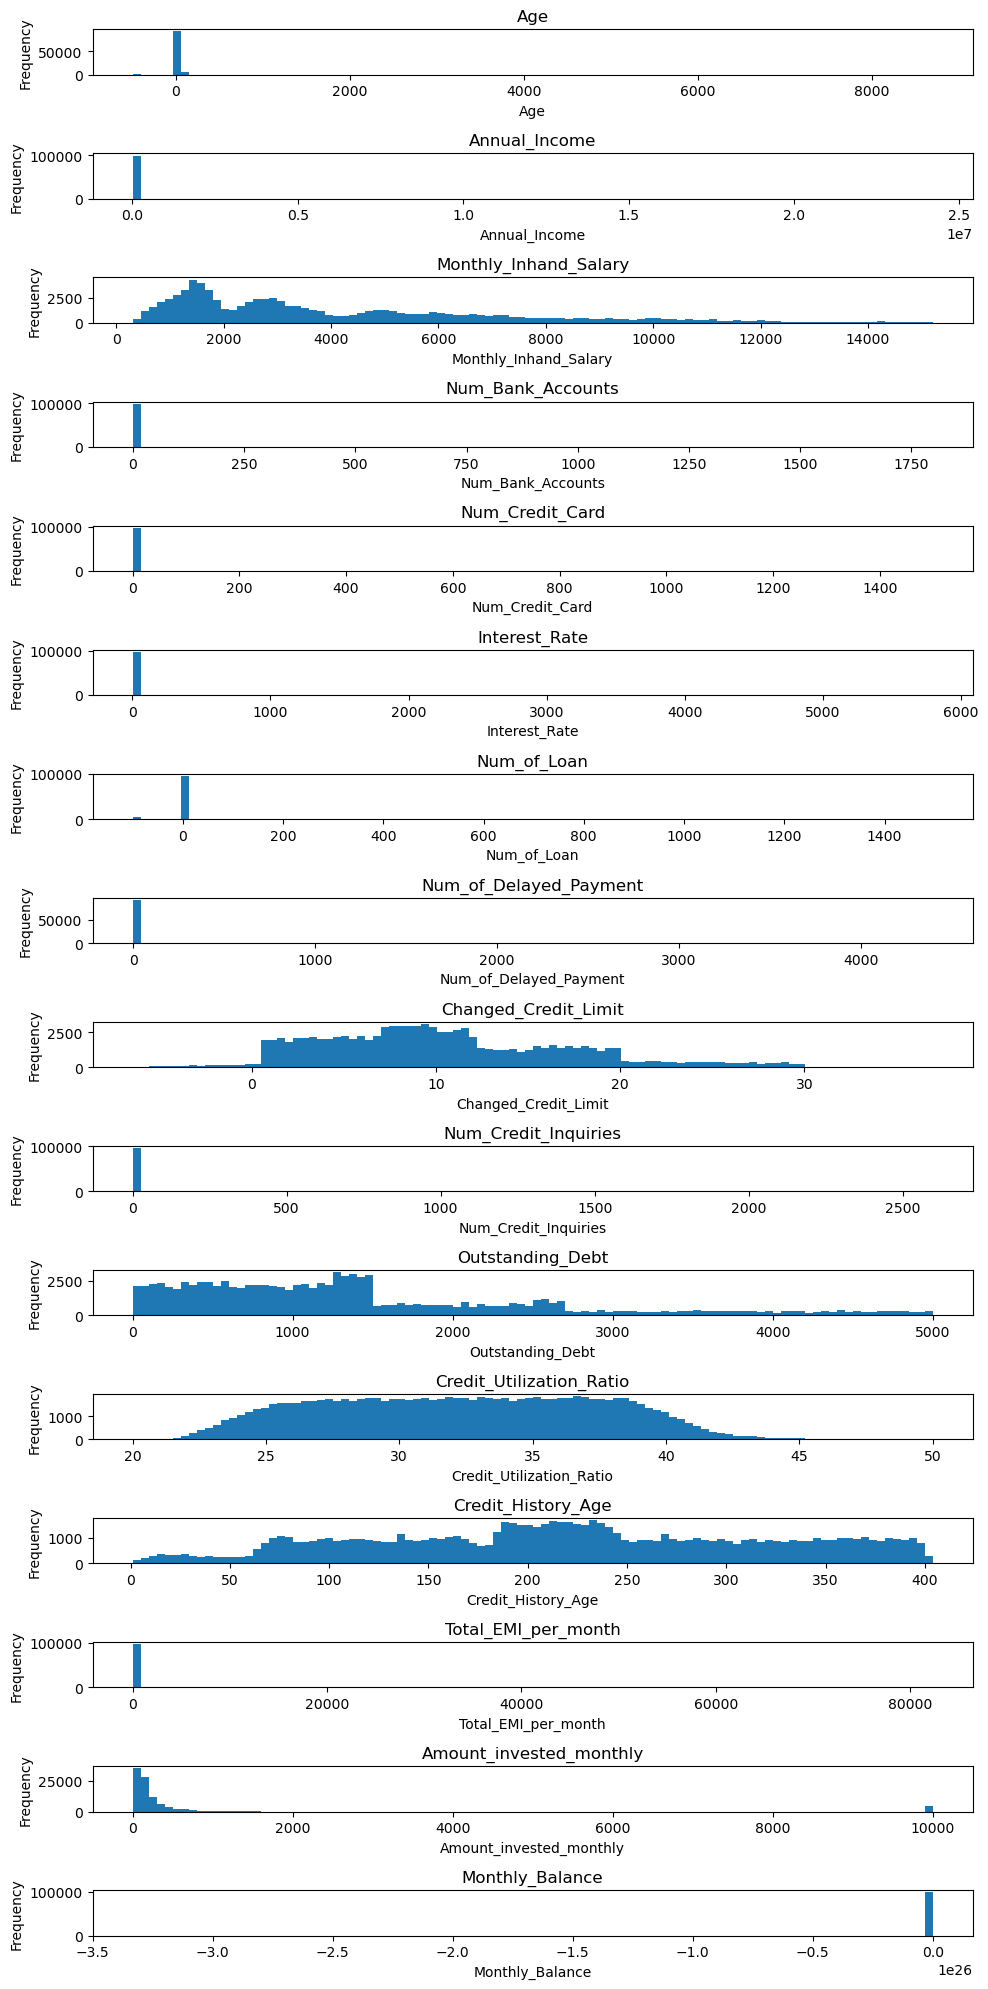

Means of the numerical columns:
-----------------------------------------
Age: 110.6497
Annual_Income: 176415.70129814997
Monthly_Inhand_Salary: 4194.170849600523
Num_Bank_Accounts: 17.09128
Num_Credit_Card: 22.47443
Interest_Rate: 72.46604
Num_of_Loan: 3.00996
Num_of_Delayed_Payment: 30.923342437471774
Changed_Credit_Limit: 10.389025115157953
Num_Credit_Inquiries: 27.75425103279441
Outstanding_Debt: 1426.220376
Credit_Utilization_Ratio: 32.2851725189436
Credit_History_Age: 221.19540507859733
Total_EMI_per_month: 1403.1182166159933
Amount_invested_monthly: 637.4129984078688
Monthly_Balance: -3.0364372469635625e+22

Number of outliers in each column:
-----------------------------------------
Age: 2781
Annual_Income: 2783
Monthly_Inhand_Salary: 1683
Num_Bank_Accounts: 1315
Num_Credit_Card: 2271
Interest_Rate: 2034
Num_of_Loan: 4348
Num_of_Delayed_Payment: 736
Changed_Credit_Limit: 668
Num_Credit_Inquiries: 1650
Outstanding_Debt: 5272
Credit_Utilization_Ratio: 4
Credit_History_Age: 0
Tota

In [166]:
# Visualization of distributions
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))
for i, col in enumerate(numerical_cols):
    df[col].plot(kind='hist', bins=100, ax=axes[i], title=col)
    axes[i].set_xlabel(col)
plt.tight_layout()
plt.show()

# Calculate and print the mean for each numerical column
print("Means of the numerical columns:")
print('-----------------------------------------')
for col in numerical_cols:
    print(f"{col}: {df[col].mean()}")

# Identify outliers using the IQR method
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print the number of outliers in each column
print("\nNumber of outliers in each column:")
print('-----------------------------------------')
for col in outliers:
    print(f"{col}: {len(outliers[col])}")

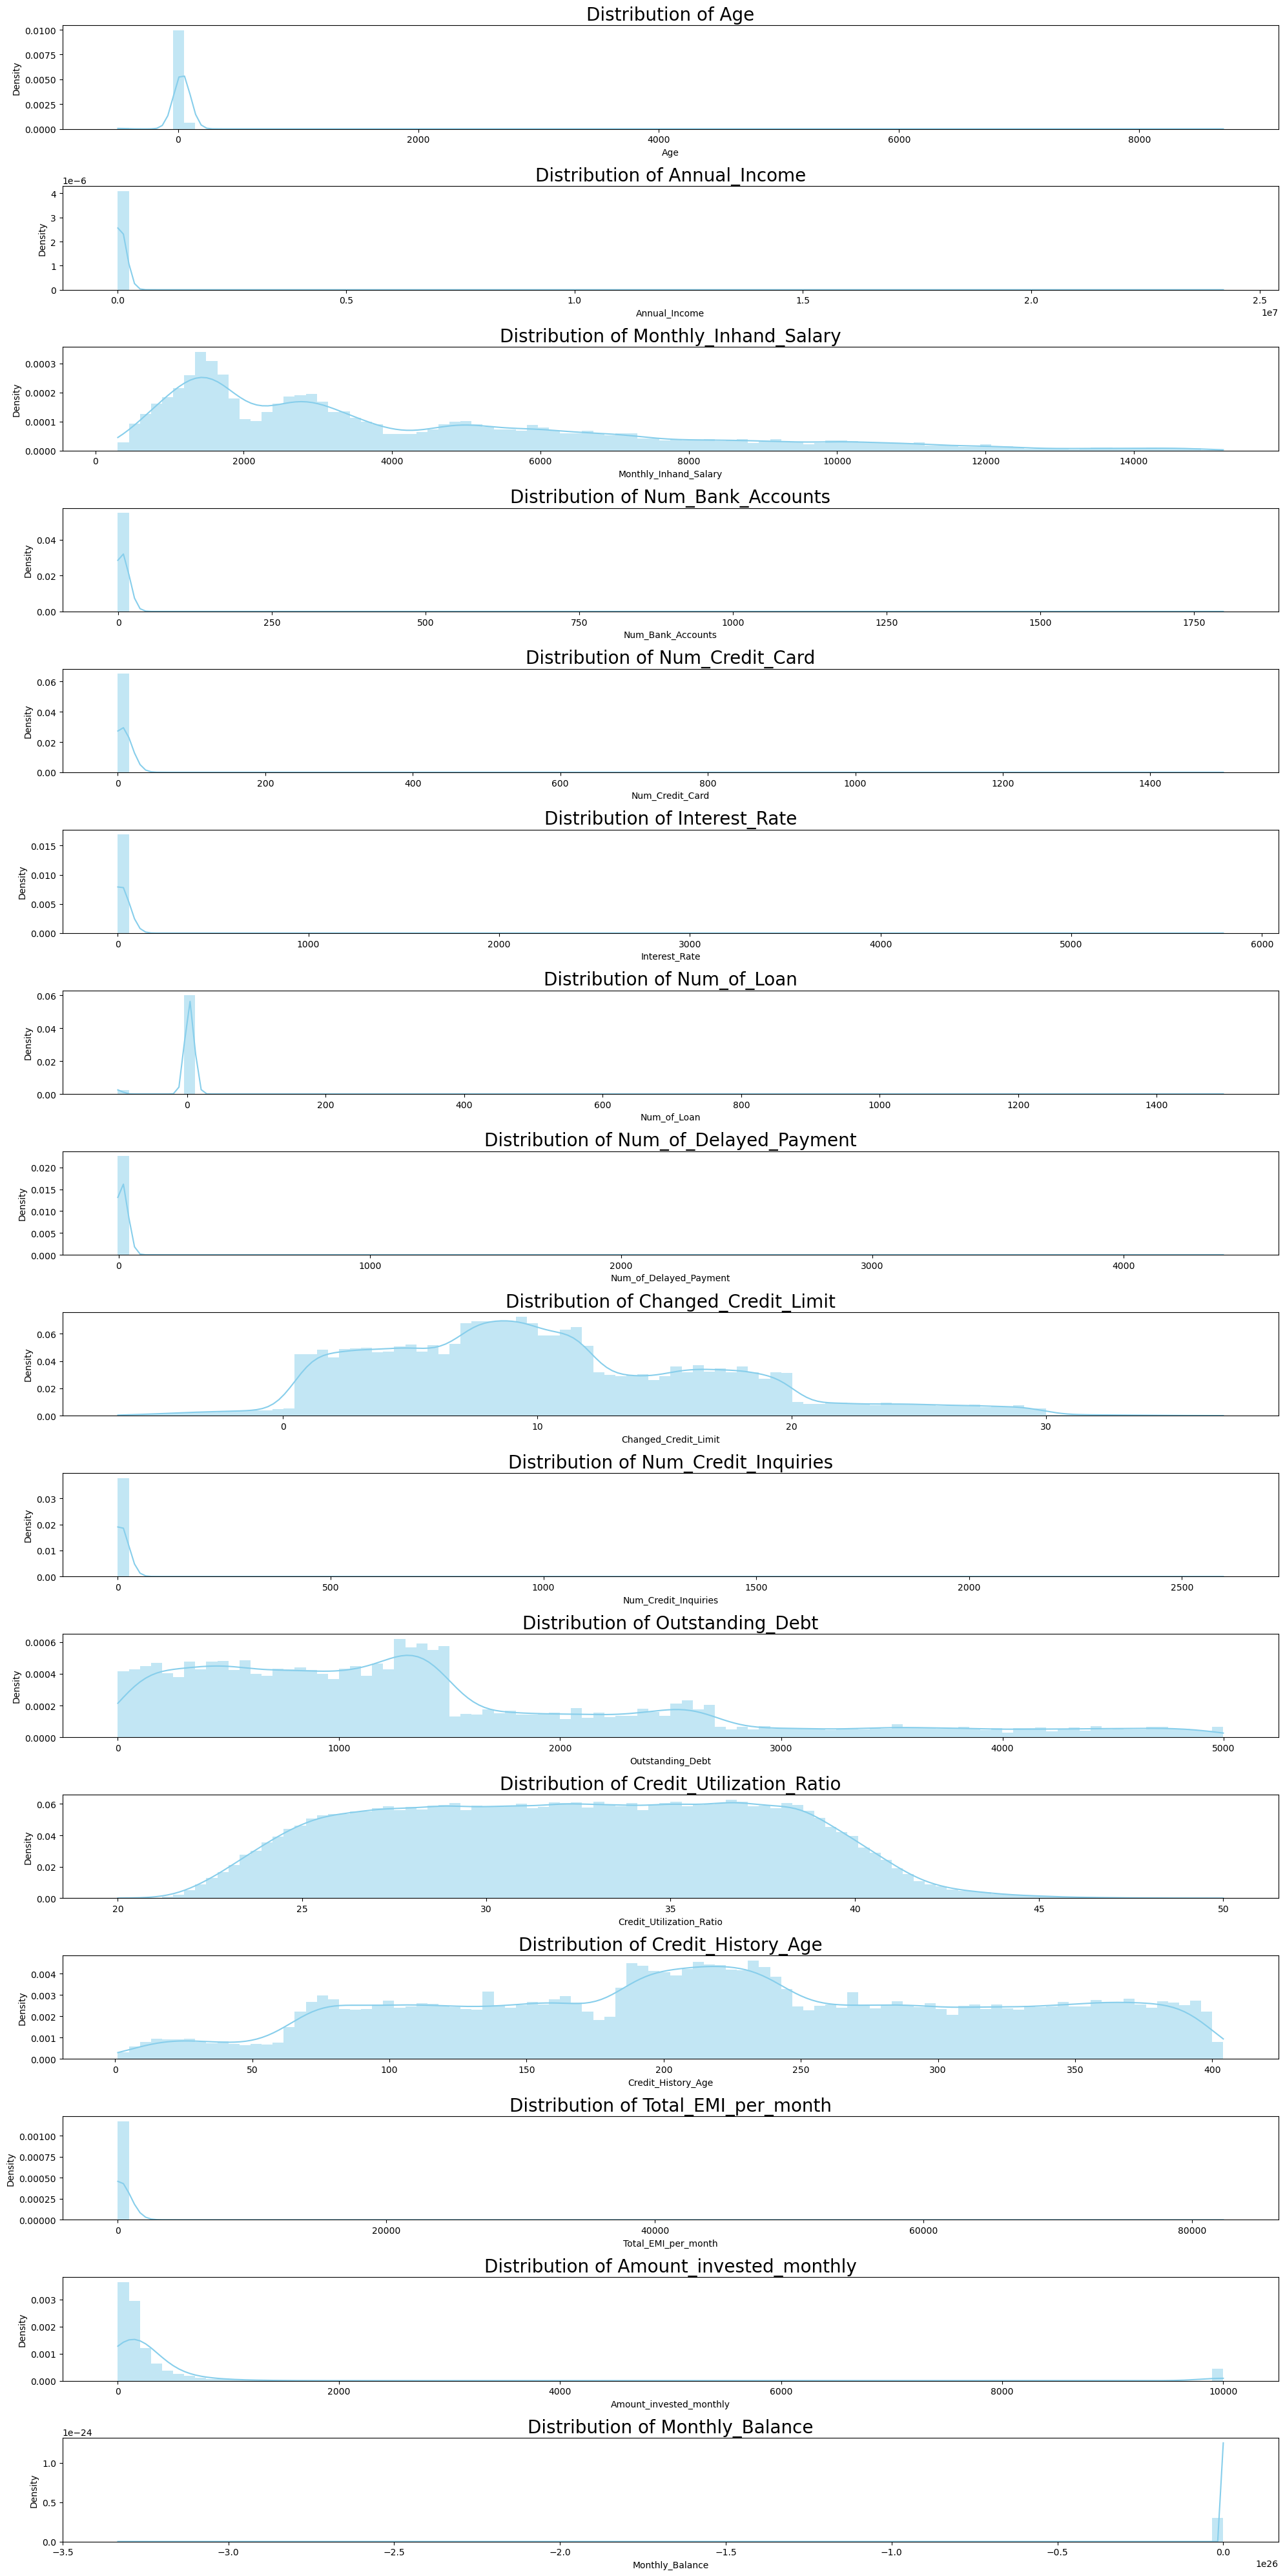

Means of the numerical columns:
-----------------------------------------
Age: 110.6497
Annual_Income: 176415.70129814997
Monthly_Inhand_Salary: 4194.170849600523
Num_Bank_Accounts: 17.09128
Num_Credit_Card: 22.47443
Interest_Rate: 72.46604
Num_of_Loan: 3.00996
Num_of_Delayed_Payment: 30.923342437471774
Changed_Credit_Limit: 10.389025115157953
Num_Credit_Inquiries: 27.75425103279441
Outstanding_Debt: 1426.220376
Credit_Utilization_Ratio: 32.2851725189436
Credit_History_Age: 221.19540507859733
Total_EMI_per_month: 1403.1182166159933
Amount_invested_monthly: 637.4129984078688
Monthly_Balance: -3.0364372469635625e+22


In [162]:
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn is great for statistical visualizations

# Assuming 'numerical_cols' is defined and 'df' is your DataFrame
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(20, 40))

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, stat="density", bins=100, ax=axes[i], color="skyblue", linewidth=0)
    axes[i].set_title(f'Distribution of {col}', fontsize=20)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    
plt.tight_layout()
plt.show()

# Calculate and print the mean for each numerical column
print("Means of the numerical columns:")
print('-----------------------------------------')
for col in numerical_cols:
    print(f"{col}: {df[col].mean()}")

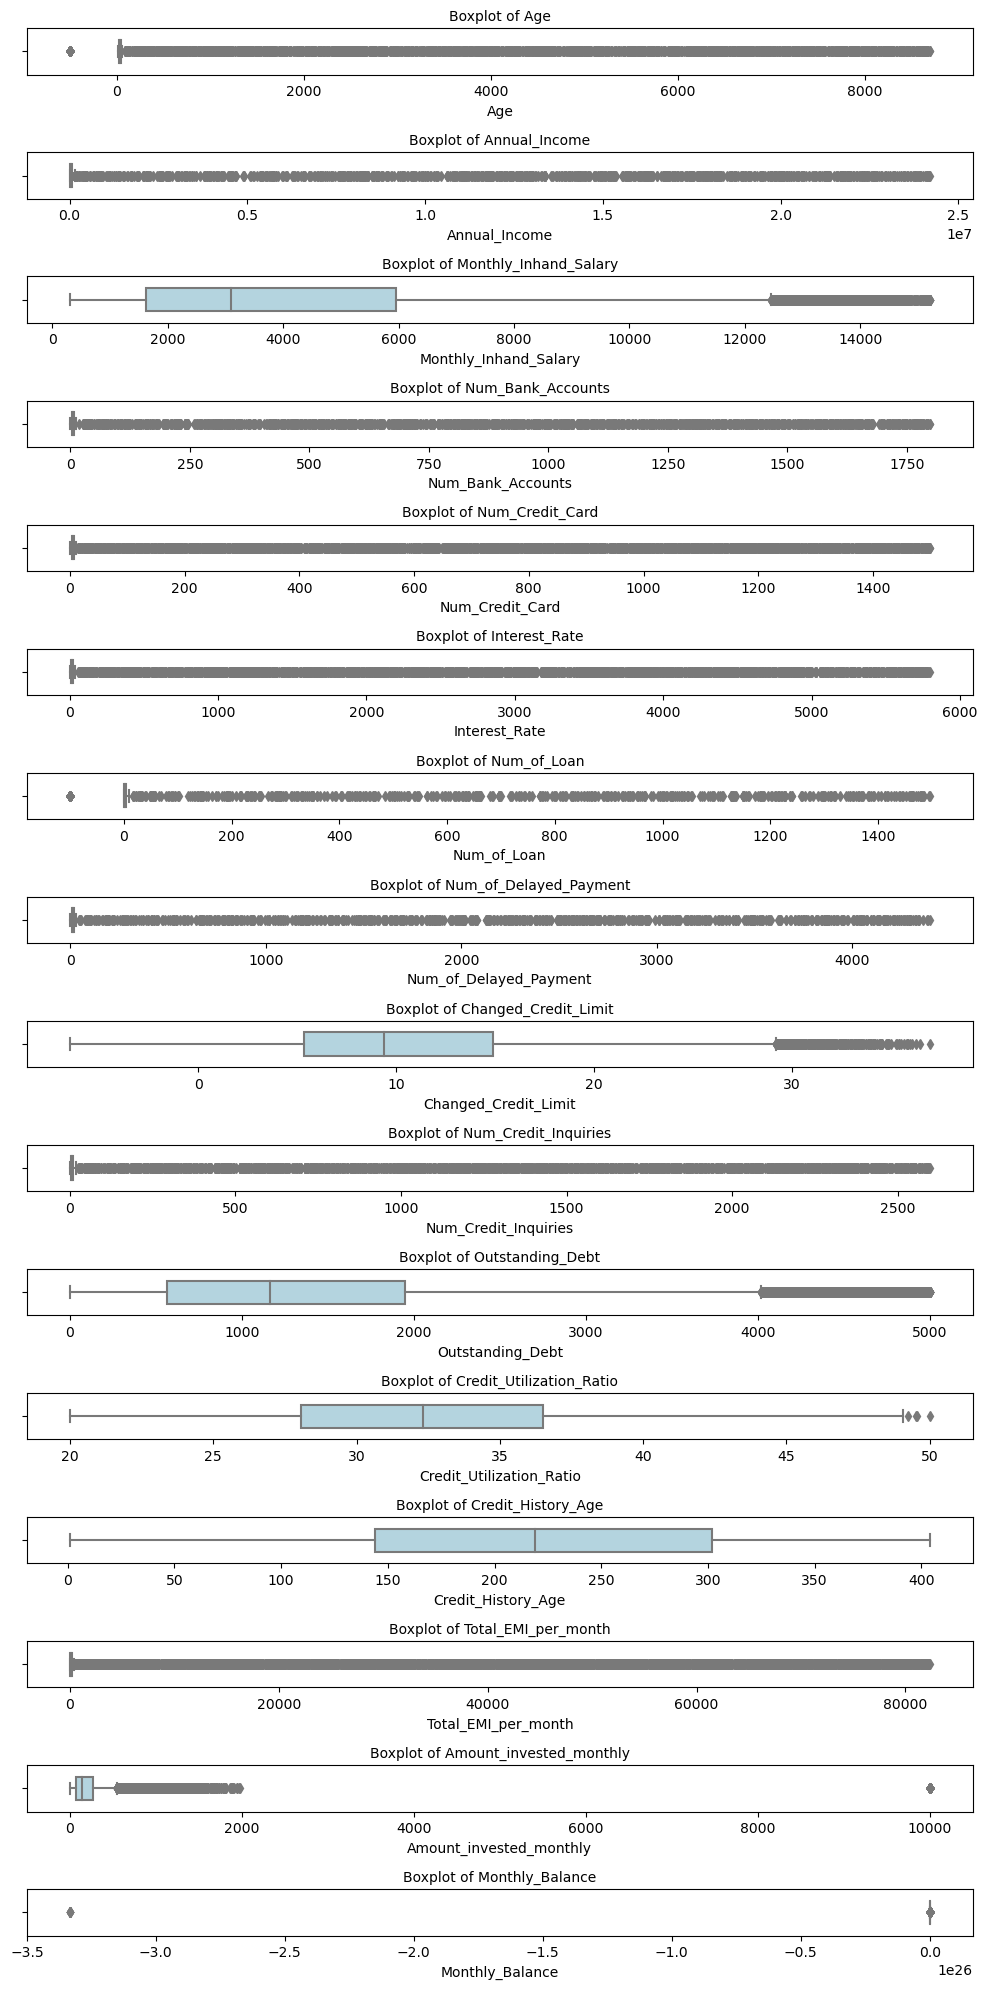

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'numerical_cols' is defined and 'df' is your DataFrame
fig, axes = plt.subplots(len(numerical_cols), 1, figsize=(10, 20))

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="lightblue", width=0.5)
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


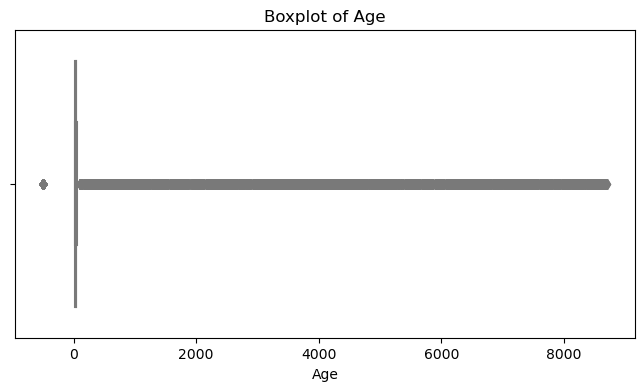

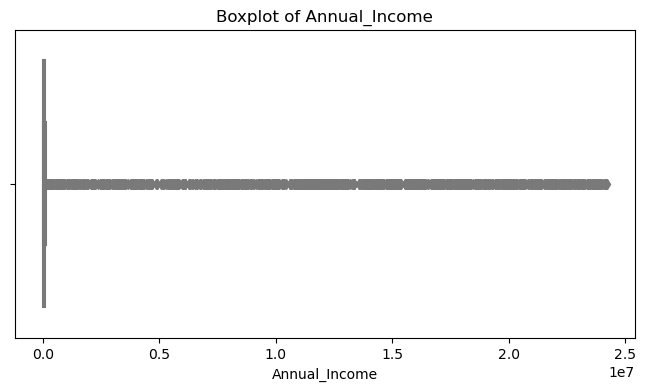

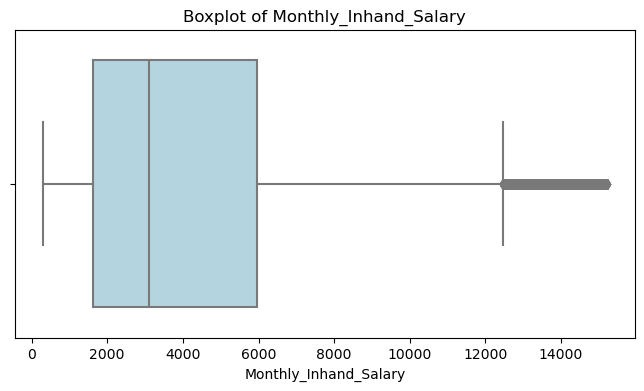

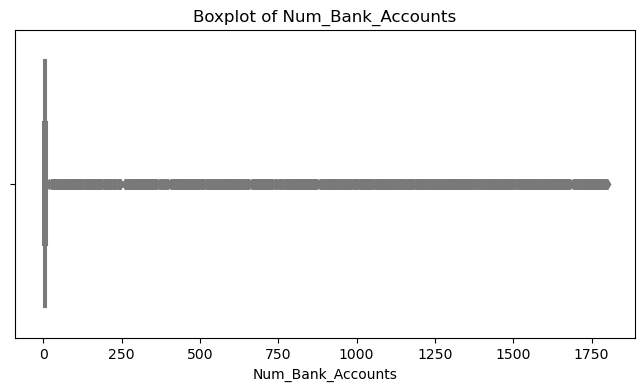

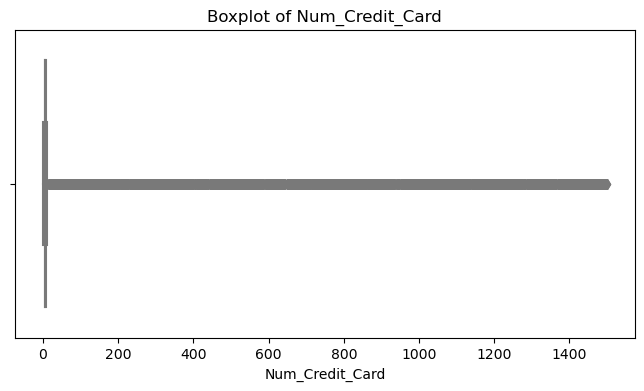

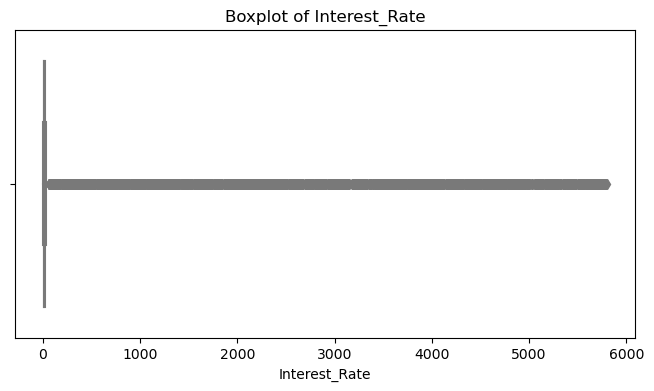

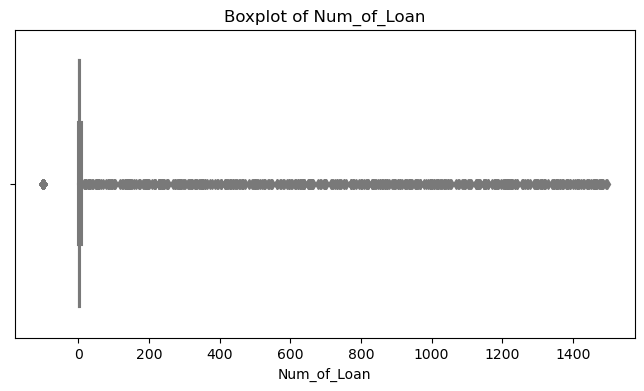

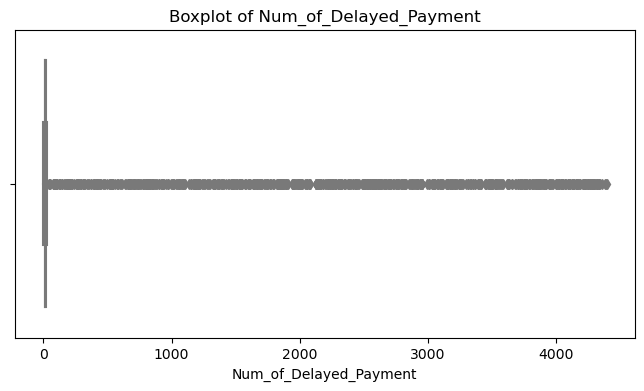

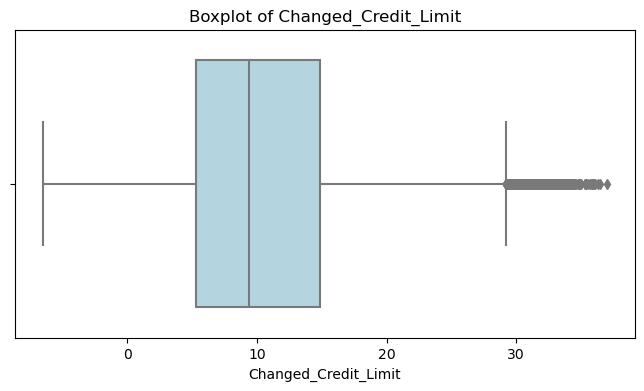

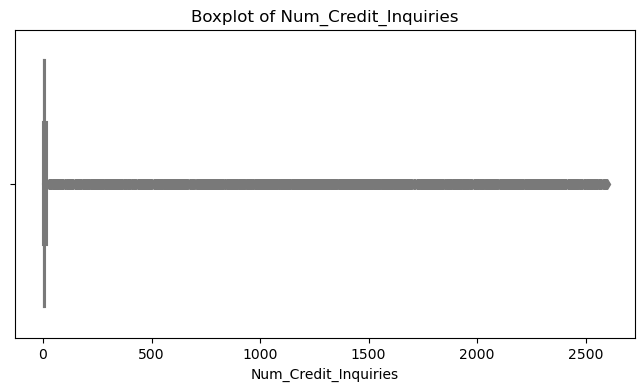

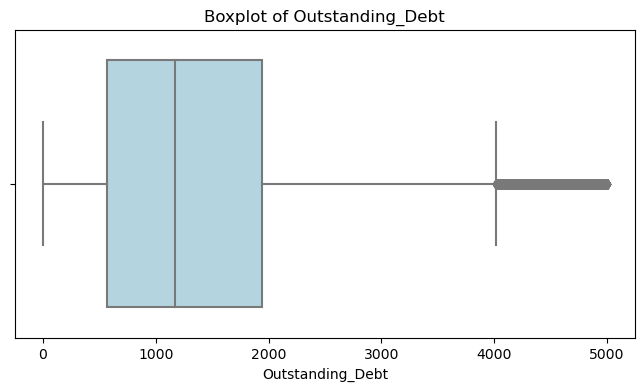

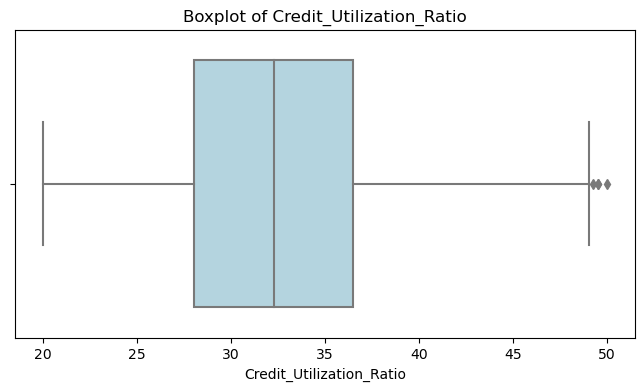

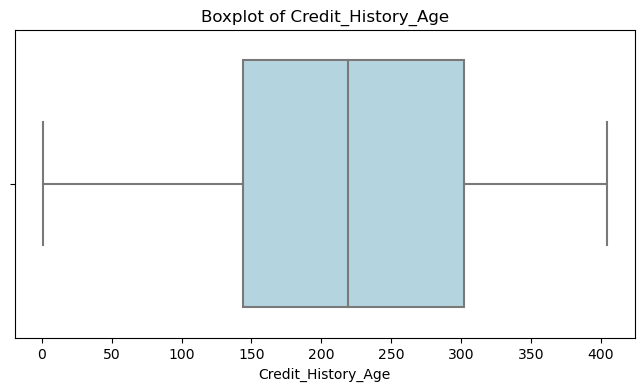

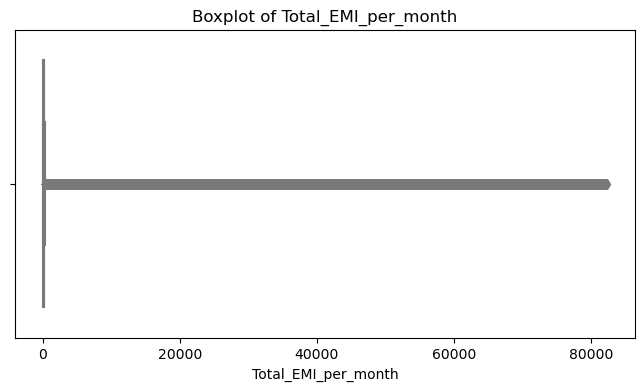

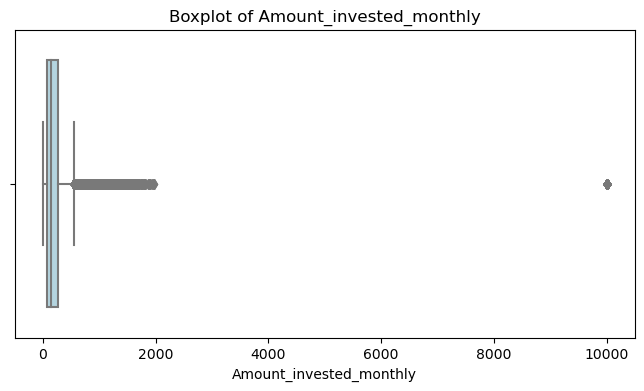

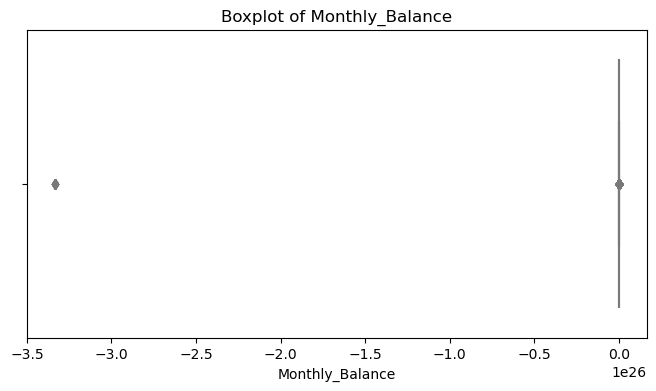

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for 'Age'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Age'], color="lightblue")
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.show()

# Boxplot for 'Annual_Income'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Annual_Income'], color="lightblue")
plt.title('Boxplot of Annual_Income')
plt.xlabel('Annual_Income')
plt.show()

# Boxplot for 'Monthly_Inhand_Salary'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Monthly_Inhand_Salary'], color="lightblue")
plt.title('Boxplot of Monthly_Inhand_Salary')
plt.xlabel('Monthly_Inhand_Salary')
plt.show()

# Boxplot for 'Num_Bank_Accounts'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Num_Bank_Accounts'], color="lightblue")
plt.title('Boxplot of Num_Bank_Accounts')
plt.xlabel('Num_Bank_Accounts')
plt.show()

# Boxplot for 'Num_Credit_Card'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Num_Credit_Card'], color="lightblue")
plt.title('Boxplot of Num_Credit_Card')
plt.xlabel('Num_Credit_Card')
plt.show()

# Boxplot for 'Interest_Rate'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Interest_Rate'], color="lightblue")
plt.title('Boxplot of Interest_Rate')
plt.xlabel('Interest_Rate')
plt.show()

# Boxplot for 'Num_of_Loan'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Num_of_Loan'], color="lightblue")
plt.title('Boxplot of Num_of_Loan')
plt.xlabel('Num_of_Loan')
plt.show()

# Boxplot for 'Num_of_Delayed_Payment'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Num_of_Delayed_Payment'], color="lightblue")
plt.title('Boxplot of Num_of_Delayed_Payment')
plt.xlabel('Num_of_Delayed_Payment')
plt.show()

# Boxplot for 'Changed_Credit_Limit'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Changed_Credit_Limit'], color="lightblue")
plt.title('Boxplot of Changed_Credit_Limit')
plt.xlabel('Changed_Credit_Limit')
plt.show()

# Boxplot for 'Num_Credit_Inquiries'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Num_Credit_Inquiries'], color="lightblue")
plt.title('Boxplot of Num_Credit_Inquiries')
plt.xlabel('Num_Credit_Inquiries')
plt.show()

# Boxplot for 'Outstanding_Debt'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Outstanding_Debt'], color="lightblue")
plt.title('Boxplot of Outstanding_Debt')
plt.xlabel('Outstanding_Debt')
plt.show()

# Boxplot for 'Credit_Utilization_Ratio'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Credit_Utilization_Ratio'], color="lightblue")
plt.title('Boxplot of Credit_Utilization_Ratio')
plt.xlabel('Credit_Utilization_Ratio')
plt.show()

# Boxplot for 'Credit_History_Age'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Credit_History_Age'], color="lightblue")
plt.title('Boxplot of Credit_History_Age')
plt.xlabel('Credit_History_Age')
plt.show()

# Boxplot for 'Total_EMI_per_month'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Total_EMI_per_month'], color="lightblue")
plt.title('Boxplot of Total_EMI_per_month')
plt.xlabel('Total_EMI_per_month')
plt.show()

# Boxplot for 'Amount_invested_monthly'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Amount_invested_monthly'], color="lightblue")
plt.title('Boxplot of Amount_invested_monthly')
plt.xlabel('Amount_invested_monthly')
plt.show()

# Boxplot for 'Monthly_Balance'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['Monthly_Balance'], color="lightblue")
plt.title('Boxplot of Monthly_Balance')
plt.xlabel('Monthly_Balance')
plt.show()


## Check outliers

In [82]:
numerical_cols = [col for col in df.columns if (df[col].dtype == 'int64') | (df[col].dtype == 'float64')]

for x in list(numerical_cols):
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    iqr = q75-q25
 
    max = q75+(1.5*iqr)
    min = q25-(1.5*iqr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [84]:
df['Type_of_Loan']

ID
0x1602     Auto Loan, Credit-Builder Loan, Personal Loan,...
0x1603     Auto Loan, Credit-Builder Loan, Personal Loan,...
0x1604     Auto Loan, Credit-Builder Loan, Personal Loan,...
0x1605     Auto Loan, Credit-Builder Loan, Personal Loan,...
0x1606     Auto Loan, Credit-Builder Loan, Personal Loan,...
                                 ...                        
0x25fe9                          Auto Loan, and Student Loan
0x25fea                          Auto Loan, and Student Loan
0x25feb                          Auto Loan, and Student Loan
0x25fec                          Auto Loan, and Student Loan
0x25fed                          Auto Loan, and Student Loan
Name: Type_of_Loan, Length: 100000, dtype: object

## Handle missing values

In [85]:
#Check for the number of null values
df.isnull().sum()

Customer_ID                     0
Month                           0
Age                          2781
Occupation                   7062
Annual_Income                2783
Monthly_Inhand_Salary       15002
Num_Bank_Accounts            1315
Num_Credit_Card              2271
Interest_Rate                2034
Num_of_Loan                  4348
Type_of_Loan                11408
Delay_from_due_date          4002
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt             5272
Credit_Utilization_Ratio        4
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month          6795
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [86]:
#check number of rows that have missing values
num_missing_rows = df.isnull().any(axis=1).sum()
num_missing_rows

71757

In [87]:
#check the percentage of rows that have missing values
percentage= num_missing_rows/len(df)*100
percentage

71.757

In [88]:
# Calculate the percentage of missing values for each column in the DataFrame
missing_value_percentages = (df.isnull().sum() / len(df)) * 100
missing_value_percentages

Customer_ID                  0.000
Month                        0.000
Age                          2.781
Occupation                   7.062
Annual_Income                2.783
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            1.315
Num_Credit_Card              2.271
Interest_Rate                2.034
Num_of_Loan                  4.348
Type_of_Loan                11.408
Delay_from_due_date          4.002
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                  20.195
Outstanding_Debt             5.272
Credit_Utilization_Ratio     0.004
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          6.795
Amount_invested_monthly      4.479
Payment_Behaviour            7.600
Monthly_Balance              2.868
Credit_Score                 0.000
dtype: float64

In [50]:
## Credit_Mix has the largest number of missing values

<Axes: >

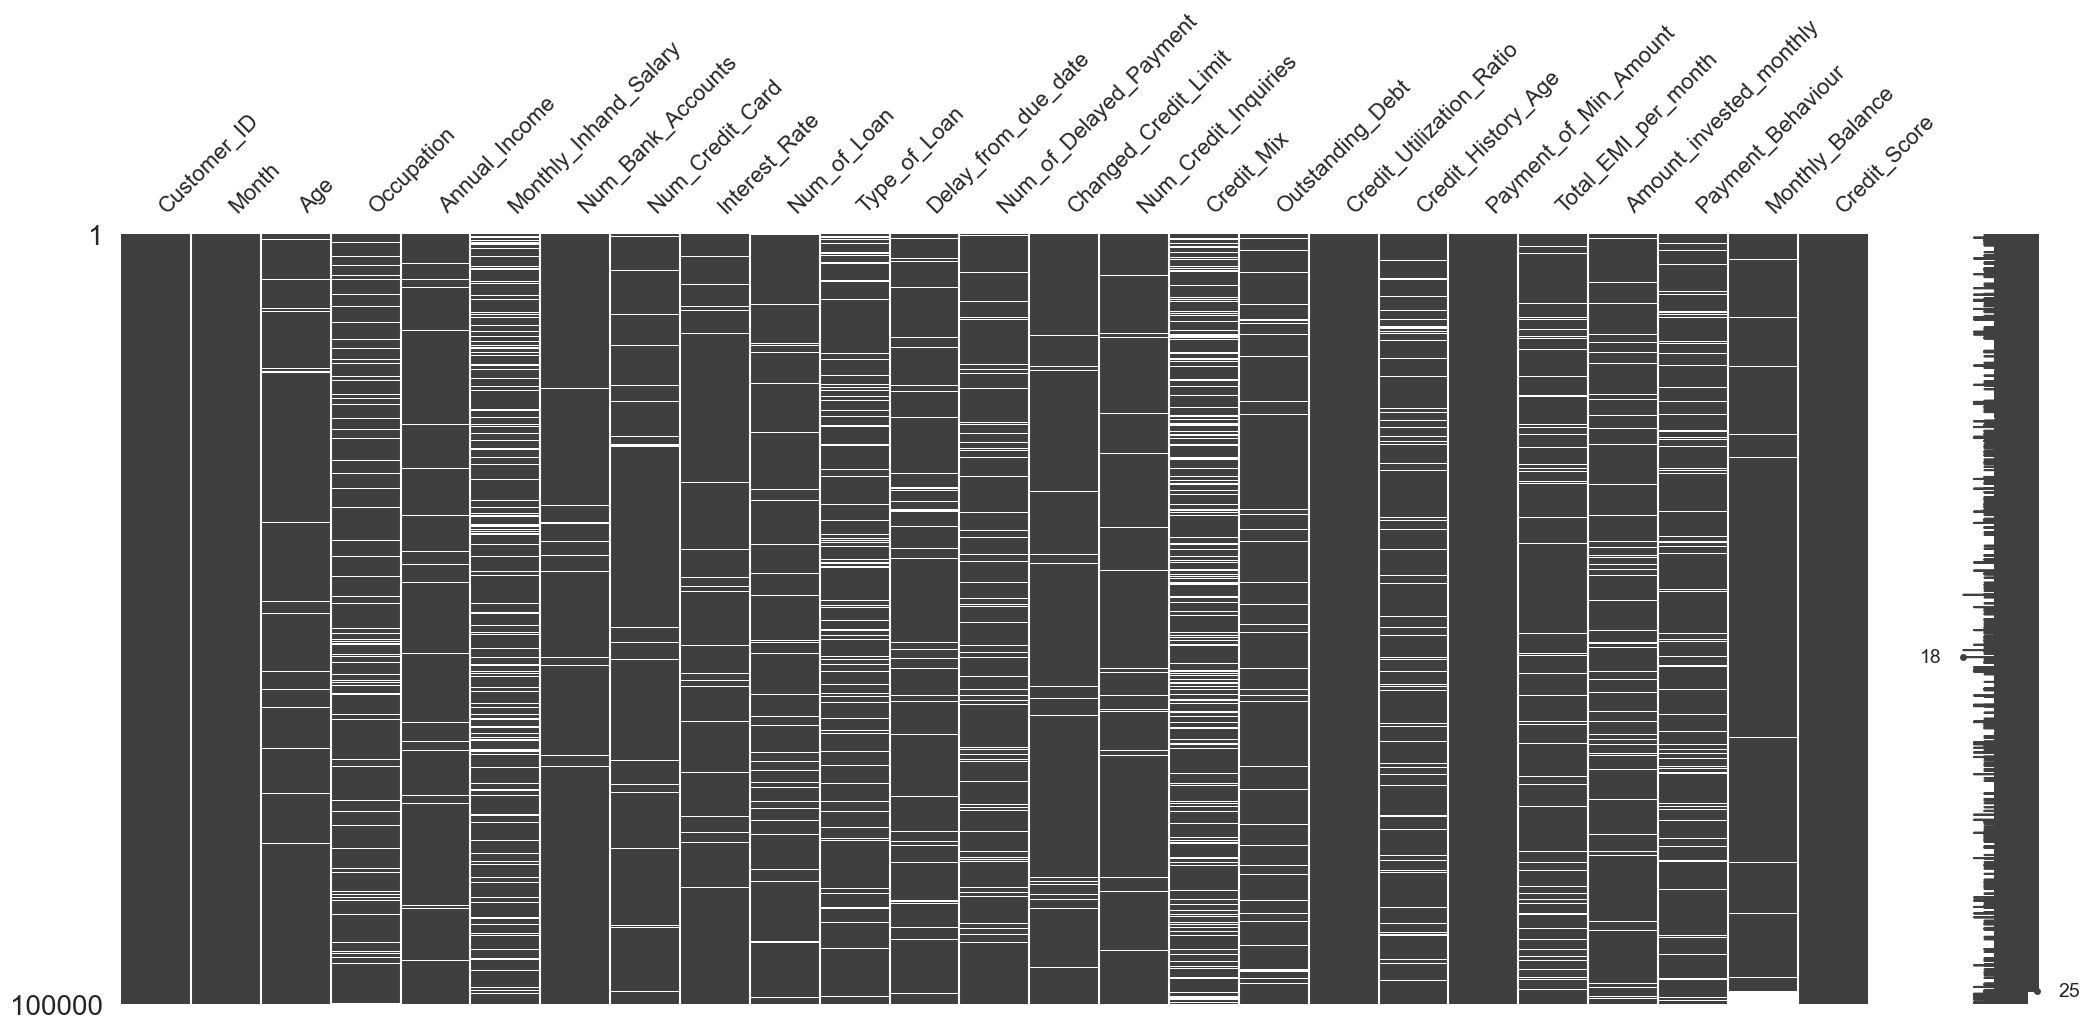

In [95]:
msno.matrix(df)

## Visualize target variable

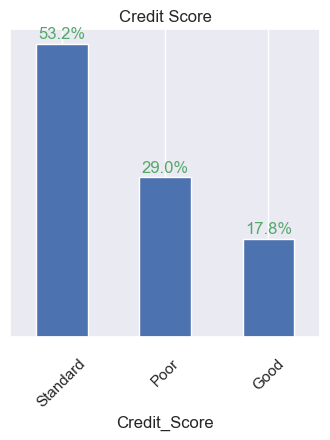

In [96]:
# credits to Dimitrios Karslidis for this beautiful visualization
def visualize_target(data, target_encoding = 'Credit_Score', figsize = (4, 4)):
    sns.set(font_scale = 1)
    plt.figure(figsize = figsize)
    rel_freq = data[target_encoding].value_counts(normalize = True, ascending = False) * 100

    rel_freq.plot(kind = 'bar', rot = 45)

    for i in range(rel_freq.shape[0]):
        plt.text(i, rel_freq.iloc[i] + 0.5, str(round(rel_freq.iloc[i], 1)) + '%',
                 ha = 'center',va = 'bottom', color = 'g')

    plt.yticks([], [])
    plt.title(' '.join(target_encoding.split('_')));
visualize_target(df)

## Distribution

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,97219.0,3.332001e+01,1.076956e+01,1.400000e+01,24.000000,33.000000,42.000000,56.000000
Annual_Income,97217.0,4.834657e+04,3.515355e+04,7.005930e+03,19205.485000,36403.980000,69788.080000,152574.760000
Monthly_Inhand_Salary,84998.0,4.194171e+03,3.183686e+03,3.036454e+02,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,98685.0,5.367624e+00,2.593839e+00,-1.000000e+00,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,97729.0,5.533322e+00,2.067703e+00,0.000000e+00,4.000000,5.000000,7.000000,11.000000
Interest_Rate,97966.0,1.453160e+01,8.739748e+00,1.000000e+00,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,95652.0,3.533758e+00,2.447308e+00,0.000000e+00,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,95998.0,1.947493e+01,1.289632e+01,-5.000000e+00,10.000000,17.000000,27.000000,55.000000
Num_of_Delayed_Payment,92998.0,3.092334e+01,2.260319e+02,-3.000000e+00,9.000000,14.000000,18.000000,4397.000000
Changed_Credit_Limit,97909.0,1.038903e+01,6.789496e+00,-6.490000e+00,5.320000,9.400000,14.870000,36.970000


In [59]:
df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,19114.119141,1824.843333,3,4,3,4,...,_,809.97998,26.822620,265,No,49.574949,80.415298,High_spent_Small_value_payments,312.49408,Good
6,CUS_0xd40,July,23,Scientist,19114.119141,1824.843333,3,4,3,4,...,Good,809.97998,22.537593,271,No,49.574949,178.34407,Low_spent_Small_value_payments,244.565323,Good
8,CUS_0x21b1,January,28,_______,34847.839844,3037.986667,2,4,6,1,...,Good,605.030029,24.464031,319,No,18.816215,104.291824,Low_spent_Small_value_payments,470.690613,Standard
9,CUS_0x21b1,February,28,Teacher,34847.839844,3037.986667,2,4,6,1,...,Good,605.030029,38.550848,320,No,18.816215,40.391239,High_spent_Large_value_payments,484.591217,Good
10,CUS_0x21b1,March,28,Teacher,34847.839844,3037.986667,2,1385,6,1,...,_,605.030029,33.224951,321,No,18.816215,58.515976,High_spent_Large_value_payments,466.466461,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,CUS_0x942c,March,25,Mechanic,39628.988281,3359.415833,4,6,7,2,...,_,502.380005,39.323569,377,No,35.104023,140.581406,High_spent_Medium_value_payments,<NA>,Poor
99995,CUS_0x942c,April,25,Mechanic,39628.988281,3359.415833,4,6,7,2,...,_,502.380005,34.663572,378,No,35.104023,60.971333,High_spent_Large_value_payments,<NA>,Poor
99996,CUS_0x942c,May,25,Mechanic,39628.988281,3359.415833,4,6,7,2,...,_,502.380005,40.565631,379,No,35.104023,54.185951,High_spent_Medium_value_payments,<NA>,Poor
99997,CUS_0x942c,June,25,Mechanic,39628.988281,3359.415833,4,6,5729,2,...,Good,502.380005,41.255522,380,No,35.104023,24.028477,High_spent_Large_value_payments,<NA>,Poor


In [60]:
df.dtypes


Customer_ID                  object
Month                        object
Age                           Int16
Occupation                   object
Annual_Income               Float32
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   Int16
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment        Int16
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            Float32
Credit_Utilization_Ratio    float64
Credit_History_Age            Int16
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     Float32
Payment_Behaviour            object
Monthly_Balance             Float32
Credit_Score                 object
dtype: object

In [61]:
numerics_types = ['int8', 'uint8', 'int16', 'uint16', 'float16', 'int32', 'uint32', 'float32', 'int64', 'uint64', 'float64', 
                 'Int8', 'UInt8', 'Int16', 'UInt16', 'Int32', 'UInt32', 'Float32', 'Int64', 'UInt64', 'Float64']
credit_score_train_numeric = df.select_dtypes(include = numerics_types)

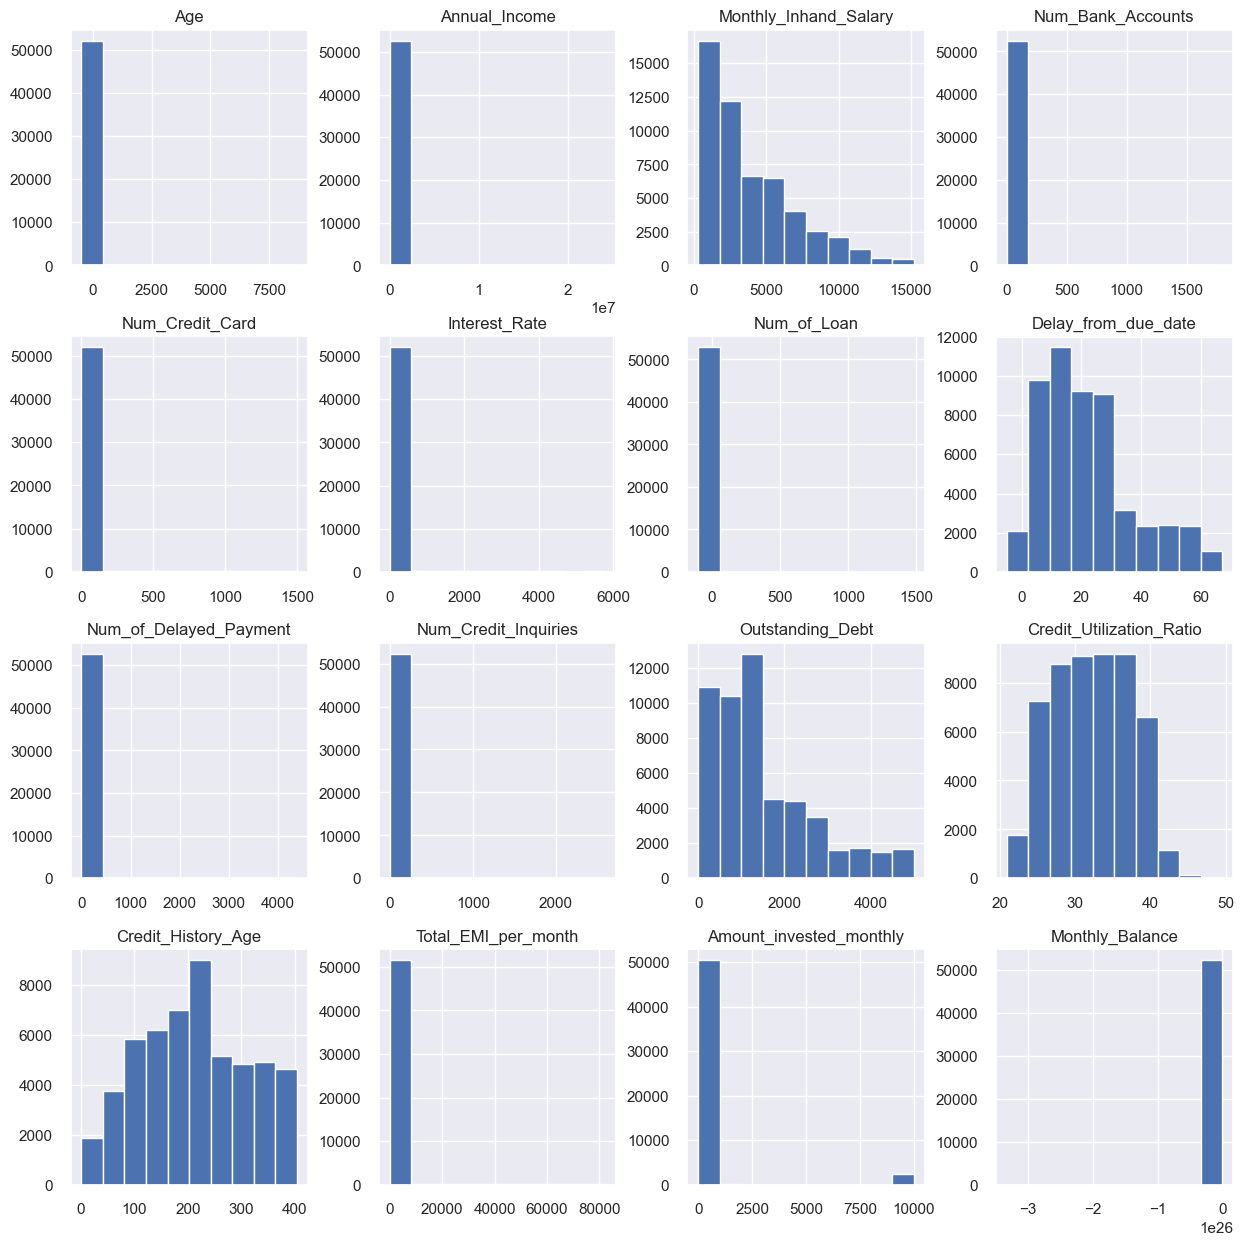

In [62]:
credit_score_train_numeric.hist(figsize = (15, 15));